In [10]:
import pandas as pd

data_path = "/Code/Statiska_metoder_uppgiften/Statiska_metoder/"

adv = pd.read_csv(data_path+("Advertising.csv"), index_col = 0)
adv.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [11]:
import numpy as np
# Y is a response variable
Y = sales = adv['sales']
#Antag att regression av 'TV' på 'sales' är ungefär linjär
# Y = B0 + B1 X 
# sales = b0 + b1 + 'tv'
# modellspecifikationsmatrisen (designmatrisen)  behöver en 1:a i första kolumnen
X = TV = np.column_stack([np.ones(Y.shape[0]),adv['TV']])
X


array([[  1. , 230.1],
       [  1. ,  44.5],
       [  1. ,  17.2],
       [  1. , 151.5],
       [  1. , 180.8],
       [  1. ,   8.7],
       [  1. ,  57.5],
       [  1. , 120.2],
       [  1. ,   8.6],
       [  1. , 199.8],
       [  1. ,  66.1],
       [  1. , 214.7],
       [  1. ,  23.8],
       [  1. ,  97.5],
       [  1. , 204.1],
       [  1. , 195.4],
       [  1. ,  67.8],
       [  1. , 281.4],
       [  1. ,  69.2],
       [  1. , 147.3],
       [  1. , 218.4],
       [  1. , 237.4],
       [  1. ,  13.2],
       [  1. , 228.3],
       [  1. ,  62.3],
       [  1. , 262.9],
       [  1. , 142.9],
       [  1. , 240.1],
       [  1. , 248.8],
       [  1. ,  70.6],
       [  1. , 292.9],
       [  1. , 112.9],
       [  1. ,  97.2],
       [  1. , 265.6],
       [  1. ,  95.7],
       [  1. , 290.7],
       [  1. , 266.9],
       [  1. ,  74.7],
       [  1. ,  43.1],
       [  1. , 228. ],
       [  1. , 202.5],
       [  1. , 177. ],
       [  1. , 293.6],
       [  1

In [12]:
# Här gör han en Linjär regression av b
b = np.linalg.pinv(X.T @ X) @ X.T @ Y
b

array([7.03259355, 0.04753664])

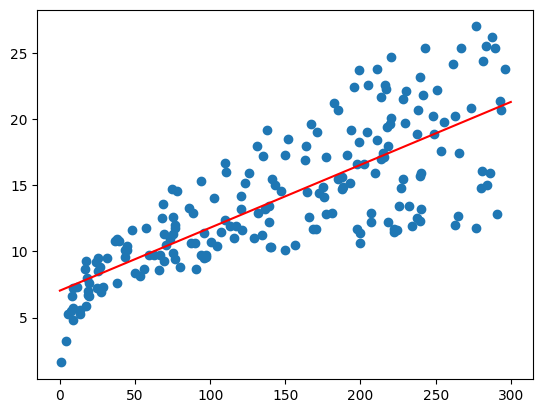

In [13]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 1], Y)
x = np.linspace(0,300)
y_hat = b[0] + b[1]*x 
plt.plot(x, y_hat, c="red")

In [14]:
#SEE - uppskattning av linjen
#stickprovs storlek
n = Y.shape[0]
# antalet parameterar, bara TV i detta fall så 1
v = X.shape[1] - 1

SEE = np.sum(np.square(Y - (X @ b)))

In [15]:
#stickprovs varians
var = SEE/(n-v-1)
S = np.sqrt(var) #residual standard error, alltså en uppskattning av standarfelet / stickprovsavvikelsen


#Sum of Squares Regression - är riktiga linjen
SSR = np.sum(b*(X.T @ Y)) - (np.square(np.sum(Y)/n))
Syy = np.sum(np.square(Y)) - (np.square(np.sum(Y)/n))
Sxx = np.sum(np.square(X)) - (np.square(np.sum(X)/n))

Sxy = (n*np.sum(X[:,1]@Y) - (np.sum(X[:,1])*np.sum(Y)))/n
#Standard error (of the mean) sigma kvadrat som är #### standard felet 
se = var / n            #o'2 / n

#b1 = lutningen - "square of standard error of B1 = var/Sxx"
se_b = var/Sxx    #- konferenans intervallet

ci = (b[1], 2*np.sqrt(se_b))      #- ci = konferans intervall
print (f"Confidence inter val on predictor B1: {ci[0]:-4f} + {ci[1]:.4f}")

Confidence inter val on predictor B1: 0.047537 + 0.0027


In [16]:
x_mean = np.mean(X[:1])
se_intercept = var *(1/n* (np.square(x_mean)/(np.square(np.sum(X-x_mean)))))
se_intercept

np.float64(2.569030937901747e-06)

In [17]:
# Borde blir [6.130, 7.935]

b[0]  

np.float64(7.03259354913008)

In [18]:
# Likelyhood
t = b[1]/se_b
t

np.float64(25827.48633055118)

In [20]:
import scipy.stats as stats
rho = Sxy /  (np.sqrt(Sxx*Syy))
Rsq = SSR/Syy  #R2  
r = stats.pearsonr(X[:,1], Y)  

In [40]:
#### för att få fram d kolla 6.4 min 40

b = np.linalg.pinv (X.T @ X) @ X.T @ Y
d = len(b)-1             #-1 för att få bort första kolumnen... b0...  man kan kalla den vad man vill i uppgiften heter den D men i videon k denna är alltså TRE DSVS TV, RADIO, NEWSPAPER
n = Y.shape[0]         # n = längden på Y            [0] står för raden dvs 5...... b0, tv, radio, newspaper, sales   
SEE =  np.sum(np.square(Y - (X @ b)))       # få fram SEE -- dvs hur långt från linjen varje punkt är  

var = SEE/(n-d-1)     # varians
S = np.sqrt(var)      #sigma S
Syy = (n*np.sum(np.square(Y)) - np.square(np.sum(Y)))/n
SSR = Syy - SEE
#SEE = Syy - SSR
# SSR_2 = (n*np.sum(b*(X.T @ Y)) - (np.square(np.sum(Y))))/n
# SSR, SSR_2

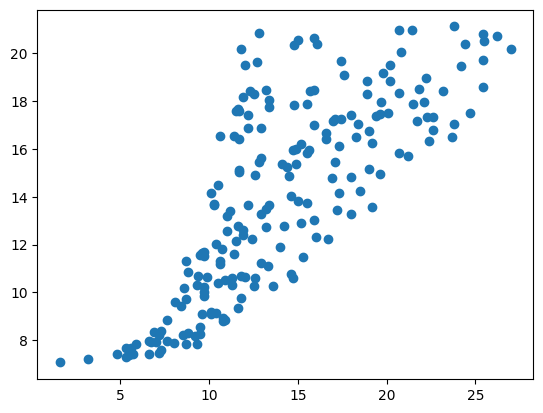

In [43]:
import matplotlib.pyplot as plt
plt.scatter(Y,X @ b)

In [47]:
b

array([7.03259355, 0.04753664])